In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
mean = [0, 0]
dObserved = 5
deltaT = 1
sd = np.sqrt(2*dObserved*deltaT)
diffusedPoints = np.random.normal(mean, sd, (200,2))

In [3]:
#Proposal
dOld = 10
dNew = np.random.normal(10, 10)
dVect = np.zeros(10000)
pVect = np.zeros(10000)

for i in range(10000):

        dNew = np.random.normal(10, 10)

        def probability(diffusion):

                # Prior
                prior = np.sum(stats.norm.logpdf(diffusedPoints))

                #liklihood
                lhood = np.sum(stats.norm.logpdf(diffusedPoints, loc = [0,0], scale = np.sqrt(2*diffusion*1)))

                prob = lhood + prior

                return prob, lhood

        pNew, lhoodNew = probability(dNew)
        pOld, lhoodOld = probability(dOld)
        
        #Acceptance value
        acc_prob = pNew - pOld

        if np.log(np.random.rand()) < acc_prob:
                dOld = dNew
                lhoodOld = lhoodNew
        dVect[i] = dOld
        pVect[i] = lhoodOld


<ipython-input-3-7842edb046e5>:17: RuntimeWarning: invalid value encountered in sqrt
  lhood = np.sum(stats.norm.logpdf(diffusedPoints, loc = [0,0], scale = np.sqrt(2*diffusion*1)))


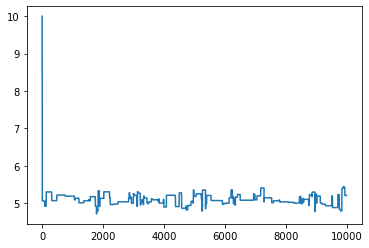

In [8]:
plt.plot(dVect)